In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import nltk
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import scikitplot as skplt
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
telegramData = pd.read_csv("cleanedTelegram.txt", header=None)
telegramData.head()

,0
0,LOADING ALL APPLE PAY USERS RN LIVE PROOF HIT ...
1,Legit drop on unverified cashapps too
2,Hmu HMU if ya need PayPal logs GET YOUR MONE...
3,Never be a loser keep fighting till you become...
4,Yall gotta know that there is know one that w...


In [8]:
telegramData['target'] = 1
T = telegramData.iloc[:60000]
T.head()

,0,target
0,LOADING ALL APPLE PAY USERS RN LIVE PROOF HIT ...,1
1,Legit drop on unverified cashapps too,1
2,Hmu HMU if ya need PayPal logs GET YOUR MONE...,1
3,Never be a loser keep fighting till you become...,1
4,Yall gotta know that there is know one that w...,1


In [9]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       60000 non-null  object
 1   target  60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.6+ KB


In [10]:
redditData = pd.read_csv("cleanedReddit.txt", header=None)
redditData.head()

,0
0,Should patients Twiiter their surgery Should h...
1,httpselectnytimescomgstabstracthtmlresF00A11F...
2,httpselectnytimescomgstabstracthtmlresF60F13F...
3,httppqasbpqarchivercomchicagotribuneaccess508...
4,httpselectnytimescomgstabstracthtmlresFB0E11F...


In [11]:
redditData['target'] = 0
R = redditData.iloc[:60000]
R.head()

,0,target
0,Should patients Twiiter their surgery Should h...,0
1,httpselectnytimescomgstabstracthtmlresF00A11F...,0
2,httpselectnytimescomgstabstracthtmlresF60F13F...,0
3,httppqasbpqarchivercomchicagotribuneaccess508...,0
4,httpselectnytimescomgstabstracthtmlresFB0E11F...,0


In [13]:
R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       60000 non-null  object
 1   target  60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.6+ KB


In [14]:
#merge both dataframes
all_data = pd.concat([T, R], ignore_index=True)
all_data.head()

,0,target
0,LOADING ALL APPLE PAY USERS RN LIVE PROOF HIT ...,1
1,Legit drop on unverified cashapps too,1
2,Hmu HMU if ya need PayPal logs GET YOUR MONE...,1
3,Never be a loser keep fighting till you become...,1
4,Yall gotta know that there is know one that w...,1


In [15]:
all_data.rename(columns = {0:'text'}, inplace = True)
all_data.head()

,text,target
0,LOADING ALL APPLE PAY USERS RN LIVE PROOF HIT ...,1
1,Legit drop on unverified cashapps too,1
2,Hmu HMU if ya need PayPal logs GET YOUR MONE...,1
3,Never be a loser keep fighting till you become...,1
4,Yall gotta know that there is know one that w...,1


In [16]:
all_data.shape

(120000, 2)

In [17]:
X, y = all_data.text, all_data.target
X.head()

0    LOADING ALL APPLE PAY USERS RN LIVE PROOF HIT ...
1                Legit drop on unverified cashapps too
2    Hmu HMU   if ya need PayPal logs GET YOUR MONE...
3    Never be a loser keep fighting till you become...
4     Yall gotta know that there is know one that w...
Name: text, dtype: object

In [18]:
# nltk.download('stopwords')
# data = all_data['text'].values
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2) # Corpus is in English
X = vectorizer.fit_transform(X)
print(X.shape)

(120000, 40833)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
#Classifier - Algorithm - SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)
SVM.fit(X_train, y_train)

predictions_SVM_train = SVM.predict(X_train)
print("SVM Accuracy Score (Training) -> ", accuracy_score(predictions_SVM_train, y_train)*100)

# predict the labels on validation dataset
predictions_SVM_test = SVM.predict(X_test)
y_svm_proba = SVM.predict_proba(X_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score (Testing) -> ", accuracy_score(predictions_SVM_test, y_test)*100)

SVM Accuracy Score (Training) ->  99.359375
SVM Accuracy Score (Testing) ->  98.87083333333334


In [23]:
print(confusion_matrix(y_test,predictions_SVM_test))
print(classification_report(y_test,predictions_SVM_test))
print(accuracy_score(y_test, predictions_SVM_test))

[[12022    49]
 [  222 11707]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12071
           1       1.00      0.98      0.99     11929

    accuracy                           0.99     24000
   macro avg       0.99      0.99      0.99     24000
weighted avg       0.99      0.99      0.99     24000

0.9887083333333333


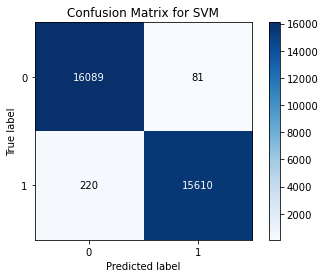

In [26]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_SVM_test, normalize=False, title = 'Confusion Matrix for SVM')

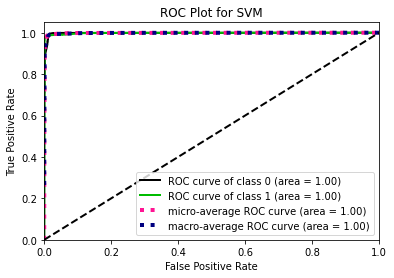

In [25]:
skplt.metrics.plot_roc(y_test, y_svm_proba, title = 'ROC Plot for SVM')

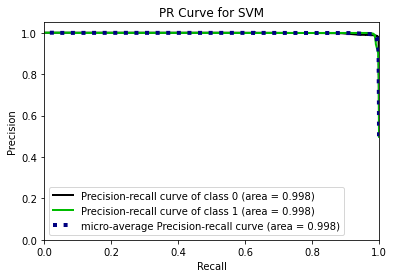

In [26]:
skplt.metrics.plot_precision_recall(y_test, y_svm_proba, title = 'PR Curve for SVM')

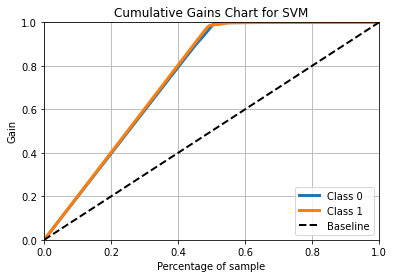

In [27]:
skplt.metrics.plot_cumulative_gain(y_test, y_svm_proba, title = 'Cumulative Gains Chart for SVM')

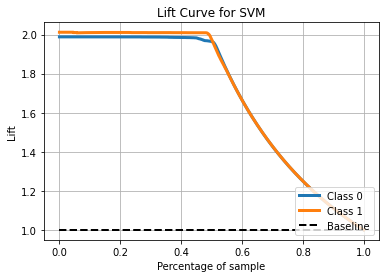

In [28]:
skplt.metrics.plot_lift_curve(y_test, y_svm_proba, title = 'Lift Curve for SVM')